In [1]:
# import pil, numpy, matplotlib
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [62]:
# open sample.jpg with PIL and convert to numpy array, RGB channels
img = Image.open('sample.jpg')
img = np.array(img)
img = img[:,:,0:3]
print(img.shape)

(500, 500, 3)


In [60]:
# recursively create quadrants. if a quadrant has shape (1, 1), stop recursion.
# if the quadrant's pixel standard deviation is less than a threshold, stop recursion.
# recursively create quadrants
def quadtree(img, threshold):
    x, y, _ = img.shape

    

    xh = x // 2
    yh = y // 2
    
    if xh < 2 or yh < 2:
        return img

    if np.any(np.where(img.std(axis=(0, 1)) > threshold)):
        img[:yh, :xh] = quadtree(img[:yh, :xh], threshold)
        img[:yh, xh:] = quadtree(img[:yh, xh:], threshold)
        img[yh:, :xh] = quadtree(img[yh:, :xh], threshold)
        img[yh:, xh:] = quadtree(img[yh:, xh:], threshold)
    
    else:
        # set all pixels of quadrant to the quadrant's mean
        img[:, :] = img.mean(axis=(0, 1))

    return img



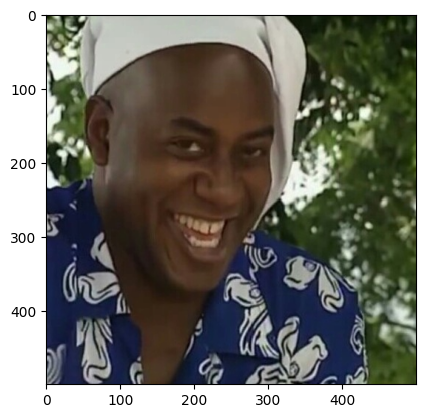

In [68]:
compressed_img = quadtree(img.copy(), 1)
plt.imshow(compressed_img, cmap='gray')
